In [1]:
import torch
import random
import numpy as np

random.seed(0)
np.random.seed(0)
torch.manual_seed(0)
torch.cuda.manual_seed(0)
torch.backends.cudnn.deterministic = True

In [2]:
import torchvision.datasets
MNIST_train = torchvision.datasets.MNIST('./', download=True, train=True)
MNIST_test = torchvision.datasets.MNIST('./', download=True, train=False)

In [3]:
# X - pictures,Y - labels

X_train = MNIST_train.data
y_train = MNIST_train.targets
X_test = MNIST_test.data
y_test = MNIST_test.targets

In [4]:
X_train.dtype, y_train.dtype

(torch.uint8, torch.int64)

In [5]:
X_train = X_train.float()
X_test = X_test.float()

X_train.dtype, X_test.dtype

(torch.float32, torch.float32)

In [6]:
X_train.shape, X_test.shape

(torch.Size([60000, 28, 28]), torch.Size([10000, 28, 28]))

In [7]:
y_train.shape, y_test.shape

(torch.Size([60000]), torch.Size([10000]))

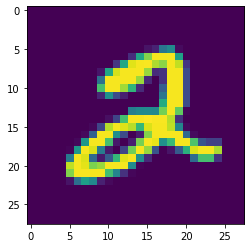

tensor(2)


In [8]:
import matplotlib.pyplot as plt

plt.imshow(X_train[5, :, :])
plt.show()
print(y_train[5]) # example

In [9]:
# two-demensional tensors

X_train = X_train.reshape([-1, 28 * 28])
X_test = X_test.reshape([-1, 28 * 28])

In [10]:
# neural network

class MNISTNet(torch.nn.Module):
    def __init__(self, n_hidden_neurons):
        super(MNISTNet, self).__init__()
        self.fc1 = torch.nn.Linear(28 * 28, n_hidden_neurons)
        self.ac1 = torch.nn.Sigmoid()
        self.fc2 = torch.nn.Linear(n_hidden_neurons, 10)  # we have 10 classes - 
                                                          # 0, 1, ..., 8, 9
    
    def forward(self, x):
        x = self.fc1(x)
        x = self.ac1(x)
        x = self.fc2(x)
        return x
    
mnist_net = MNISTNet(100)

In [11]:
torch.cuda.is_available()

True

In [12]:
device = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')
mnist_net = mnist_net.to(device)
list(mnist_net.parameters())

[Parameter containing:
 tensor([[-0.0003,  0.0192, -0.0294,  ...,  0.0219,  0.0037,  0.0021],
         [-0.0198, -0.0150, -0.0104,  ..., -0.0203, -0.0060, -0.0299],
         [-0.0201,  0.0149, -0.0333,  ..., -0.0203,  0.0012,  0.0080],
         ...,
         [ 0.0221,  0.0258, -0.0088,  ..., -0.0141,  0.0051, -0.0318],
         [-0.0217, -0.0136,  0.0185,  ..., -0.0012, -0.0012, -0.0017],
         [ 0.0142,  0.0089, -0.0053,  ...,  0.0311, -0.0181,  0.0020]],
        device='cuda:0', requires_grad=True), Parameter containing:
 tensor([-3.5402e-02,  1.8178e-02, -2.1709e-02, -1.1839e-02,  4.8722e-03,
         -1.0492e-02, -1.9008e-02,  2.6994e-02, -3.4899e-02,  1.0381e-02,
         -3.5228e-02, -5.6381e-03, -2.0134e-02, -3.0264e-02, -1.3289e-02,
          2.5346e-02, -1.0797e-02,  2.1568e-03,  4.3630e-03, -2.1916e-02,
          2.2670e-02, -1.5766e-02,  3.4906e-02, -2.3063e-02, -6.8216e-03,
          2.7051e-02, -1.3991e-02,  9.7218e-03, -9.9075e-04,  1.6625e-03,
          2.3455e-02, -2

In [13]:
loss = torch.nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(mnist_net.parameters(), lr=1.0e-3)

In [14]:
# train using SGD
batch_size = 100

test_accuracy_history = []
test_loss_history = []

X_test = X_test.to(device)
y_test = y_test.to(device)

for epoch in range(10000):
    order = np.random.permutation(len(X_train))
    
    for start_index in range(0, len(X_train), batch_size):
        optimizer.zero_grad()
        
        batch_indexes = order[start_index:start_index+batch_size]
        
        X_batch = X_train[batch_indexes].to(device)
        y_batch = y_train[batch_indexes].to(device)
        
        # predictions
        preds = mnist_net.forward(X_batch) 
        
        loss_value = loss(preds, y_batch)
        loss_value.backward()
        
        optimizer.step()

    test_preds = mnist_net.forward(X_test)
    test_loss_history.append(loss(test_preds, y_test))
    
    accuracy = (test_preds.argmax(dim=1) == y_test).float().mean()
    test_accuracy_history.append(accuracy)
    print(accuracy)

tensor(0.9103, device='cuda:0')
tensor(0.9156, device='cuda:0')
tensor(0.9165, device='cuda:0')
tensor(0.9223, device='cuda:0')
tensor(0.9230, device='cuda:0')
tensor(0.9294, device='cuda:0')
tensor(0.9300, device='cuda:0')
tensor(0.9277, device='cuda:0')
tensor(0.9314, device='cuda:0')
tensor(0.9316, device='cuda:0')
tensor(0.9296, device='cuda:0')
tensor(0.9318, device='cuda:0')
tensor(0.9345, device='cuda:0')
tensor(0.9348, device='cuda:0')
tensor(0.9350, device='cuda:0')
tensor(0.9367, device='cuda:0')
tensor(0.9358, device='cuda:0')
tensor(0.9319, device='cuda:0')
tensor(0.9369, device='cuda:0')
tensor(0.9397, device='cuda:0')
tensor(0.9420, device='cuda:0')
tensor(0.9393, device='cuda:0')
tensor(0.9449, device='cuda:0')
tensor(0.9404, device='cuda:0')
tensor(0.9423, device='cuda:0')
tensor(0.9430, device='cuda:0')
tensor(0.9406, device='cuda:0')
tensor(0.9414, device='cuda:0')
tensor(0.9456, device='cuda:0')
tensor(0.9433, device='cuda:0')
tensor(0.9430, device='cuda:0')
tensor(0

KeyboardInterrupt: ignored

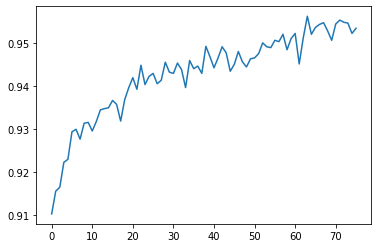

In [15]:
plt.plot(test_accuracy_history)

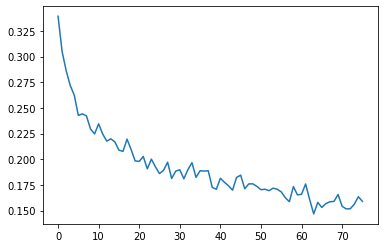

In [16]:
plt.plot(test_loss_history)